## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Name : CHARLES OTIENO ALOO
EVENING CLASSES, PART TIME DSF PT 07
PROJECT DATE 2 JUNE 2024
INSTRUCTOR : SAMUEL KARU AND FAITH ROTICH
BLOG : https://github.com/Archaloo/dsc-phase-1-project-v2-4.git

The first step would be to understand the shape of the data 

In [7]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('D:\moringa\Phase_one_all\dsc-phase-1-project-v2-4\zippedData\im.db')

# Load the movie_basics table into a DataFrame
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Load the movie_ratings table into a DataFrame
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Close the connection
conn.close()

# Display the first few rows of the DataFrames
print(movie_basics.head())
print(movie_ratings.head())







    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt106024

In [4]:
# Load the compressed CSV file into a DataFrame
movie_gross = pd.read_csv('D:\moringa\Phase_one_all\dsc-phase-1-project-v2-4\zippedData/bom.movie_gross.csv.gz', compression='gzip')

# Display the first few rows of the DataFrame
print(movie_gross.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


The im.db DataFrame contains basic information about movies. Here are the columns:

MOVIE_BASICS

movie_id: A unique identifier for each movie.
primary_title: The primary title of the movie.
original_title: The original title of the movie (could be different from the primary title).
start_year: The year the movie was released or is planned to be released.
runtime_minutes: The duration of the movie in minutes.
genres: The genres associated with the movie.

MOVIE_RATINGS

Average Rating: The averagerating provides an insight into how well a movie is received by its audience. 
Number of Votes: The numvotes provides an indication of the movie's popularity 

D:\moringa\Phase_one_all\dsc-phase-1-project-v2-4\zippedData\im.db

bom.movie_gross.csv.gz contains information about the financial performance of movies. Here is a detailed explanation of each column in the dataset:


MOVIE_GROSS

title:This column contains the title of the movie. 
studio:This column indicates the studio that produced the movie.
domestic_gross:This column shows the gross revenue earned by the movie within the domestic market (typically the United States) in dollars. 
foreign_gross:This column represents the gross revenue earned by the movie in foreign markets (outside the domestic market) in dollars.
year:This column indicates the year in which the movie was released. 

D:\moringa\Phase_one_all\dsc-phase-1-project-v2-4\zippedData/bom.movie_gross.csv.gz

we would like to avice Microsoft on the following:

1. What is the appropriate length of movie to release for the highest number of ratings?

2. Which metric closely correlates to income 

3. Which movie production studio grosses the highest income 

In [2]:
# Merge movie_basics and movie_ratings on movie_id
movies_df = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Merge movies_df with movie_gross on primary_title
movies_df = pd.merge(movies_df, movie_gross, left_on='primary_title', right_on='title')

# Drop redundant columns
movies_df = movies_df.drop(columns=['original_title', 'title'])

# Display the first few rows of the merged DataFrame
print(movies_df.head())



    movie_id                    primary_title  start_year  runtime_minutes  \
0  tt0315642                            Wazir        2016            103.0   
1  tt0337692                      On the Road        2012            124.0   
2  tt4339118                      On the Road        2014             89.0   
3  tt5647250                      On the Road        2016            121.0   
4  tt0359950  The Secret Life of Walter Mitty        2013            114.0   

                    genres  averagerating  numvotes   studio  domestic_gross  \
0       Action,Crime,Drama            7.1     15378  Relbig.       1100000.0   
1  Adventure,Drama,Romance            6.1     37886      IFC        744000.0   
2                    Drama            6.0         6      IFC        744000.0   
3                    Drama            5.7       127      IFC        744000.0   
4   Adventure,Comedy,Drama            7.3    275300      Fox      58200000.0   

  foreign_gross  year  
0           NaN  2016  
1 

merge these DataFrames to have a unified view of the data.

In [3]:
# Merge movie_basics and movie_ratings on movie_id
movies_df = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Merge movies_df with movie_gross on primary_title
movies_df = pd.merge(movies_df, movie_gross, left_on='primary_title', right_on='title')

# Drop redundant columns
movies_df = movies_df.drop(columns=['original_title', 'title'])

# Display the first few rows of the merged DataFrame
print(movies_df.head())


    movie_id                    primary_title  start_year  runtime_minutes  \
0  tt0315642                            Wazir        2016            103.0   
1  tt0337692                      On the Road        2012            124.0   
2  tt4339118                      On the Road        2014             89.0   
3  tt5647250                      On the Road        2016            121.0   
4  tt0359950  The Secret Life of Walter Mitty        2013            114.0   

                    genres  averagerating  numvotes   studio  domestic_gross  \
0       Action,Crime,Drama            7.1     15378  Relbig.       1100000.0   
1  Adventure,Drama,Romance            6.1     37886      IFC        744000.0   
2                    Drama            6.0         6      IFC        744000.0   
3                    Drama            5.7       127      IFC        744000.0   
4   Adventure,Comedy,Drama            7.3    275300      Fox      58200000.0   

  foreign_gross  year  
0           NaN  2016  
1 

Appropriate Length of Movie for Maximum Return

We will analyze the relationship between the runtime of movies and their gross income.

The domestic_gross and foreign_gross columns contain string values rather than numeric values. 

We need to convert these columns to numeric types before performing arithmetic operations.

This is done below. 

domestic_gross    float64
foreign_gross      object
dtype: object


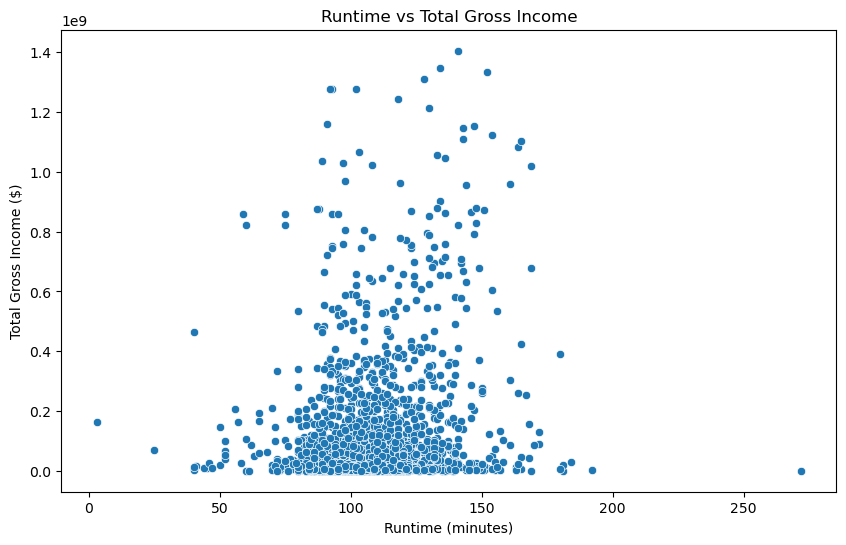

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert runtime_minutes to numeric and drop NaN values
movies_df['runtime_minutes'] = pd.to_numeric(movies_df['runtime_minutes'], errors='coerce')

# Check the data types of gross income columns
print(movies_df[['domestic_gross', 'foreign_gross']].dtypes)

# Convert gross income columns to numeric, handling strings and removing commas if necessary
movies_df['domestic_gross'] = movies_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movies_df['foreign_gross'] = movies_df['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with NaN values in critical columns
movies_df = movies_df.dropna(subset=['runtime_minutes', 'domestic_gross', 'foreign_gross'])

# Calculate total gross income
movies_df['total_gross'] = movies_df['domestic_gross'] + movies_df['foreign_gross']

# Plot runtime vs total gross income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime_minutes', y='total_gross', data=movies_df)
plt.title('Runtime vs Total Gross Income')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Total Gross Income ($)')
plt.show()



                averagerating  numvotes  domestic_gross  foreign_gross  \
averagerating        1.000000  0.375891        0.172181       0.155612   
numvotes             0.375891  1.000000        0.628365       0.553812   
domestic_gross       0.172181  0.628365        1.000000       0.790490   
foreign_gross        0.155612  0.553812        0.790490       1.000000   
total_gross          0.170158  0.611583        0.912655       0.971782   

                total_gross  
averagerating      0.170158  
numvotes           0.611583  
domestic_gross     0.912655  
foreign_gross      0.971782  
total_gross        1.000000  


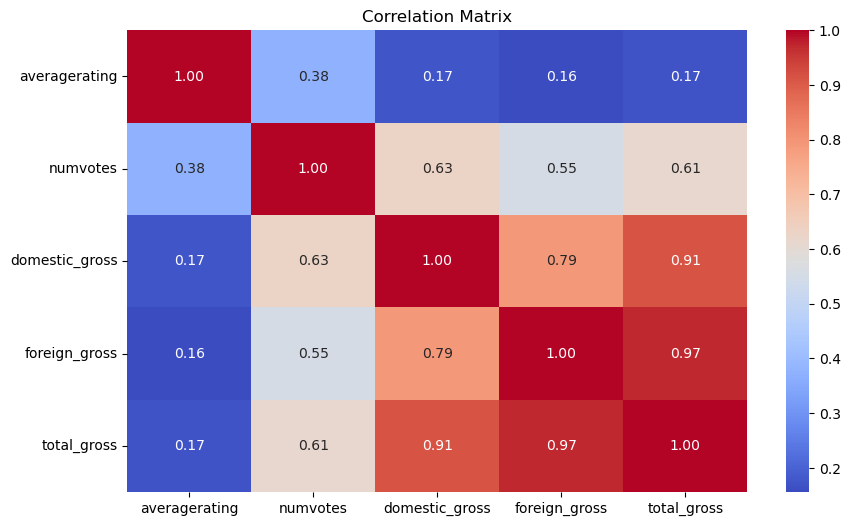

In [8]:
# Calculate correlation matrix
correlation_matrix = movies_df[['averagerating', 'numvotes', 'domestic_gross', 'foreign_gross', 'total_gross']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



      studio   total_gross
20        BV  4.193005e+10
129     Uni.  3.111925e+10
49       Fox  3.043107e+10
137       WB  2.605660e+10
119     Sony  1.808145e+10
104     Par.  1.754648e+10
138  WB (NL)  1.075220e+10
77       LGF  8.186159e+09
98      P/DW  5.076500e+09
142    Wein.  3.952179e+09


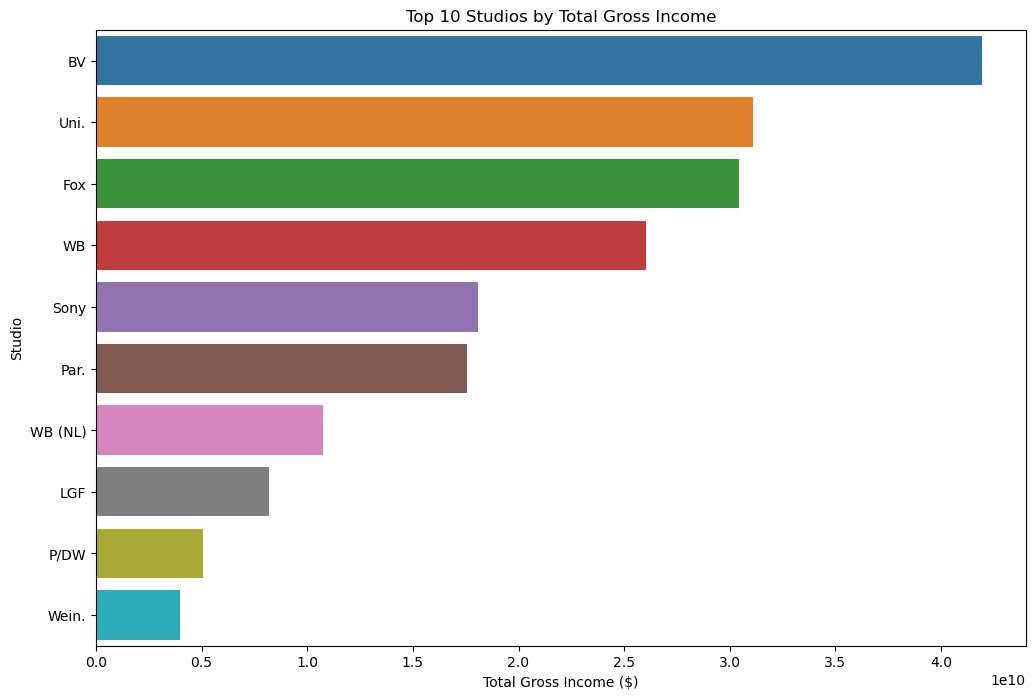

In [9]:
# Group by studio and calculate total gross income
studio_income = movies_df.groupby('studio')['total_gross'].sum().reset_index()

# Sort by total gross income in descending order
studio_income = studio_income.sort_values(by='total_gross', ascending=False)

# Display the top 10 studios by total gross income
print(studio_income.head(10))

# Plot top 10 studios by total gross income
plt.figure(figsize=(12, 8))
sns.barplot(x='total_gross', y='studio', data=studio_income.head(10))
plt.title('Top 10 Studios by Total Gross Income')
plt.xlabel('Total Gross Income ($)')
plt.ylabel('Studio')
plt.show()


Analysing the appropriate length of movie to be released

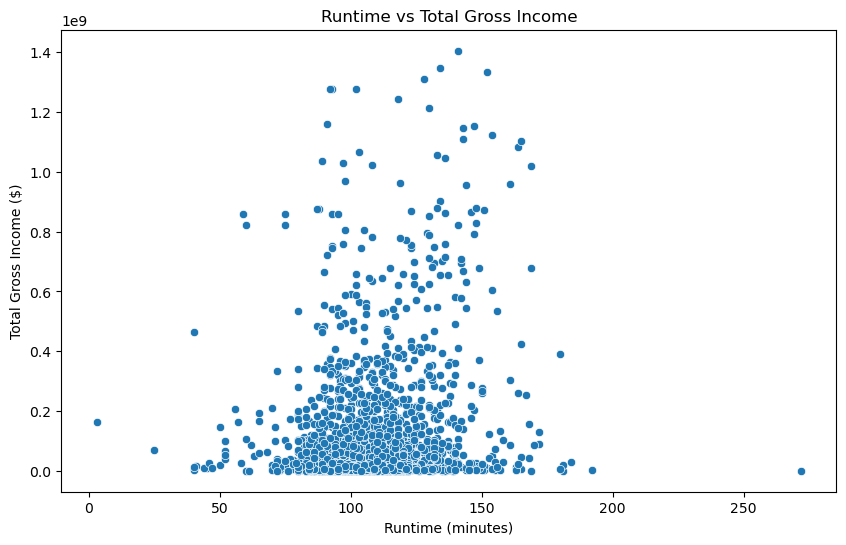

The average runtime of movies is 107.83 minutes.
The median runtime of movies is 106.00 minutes.


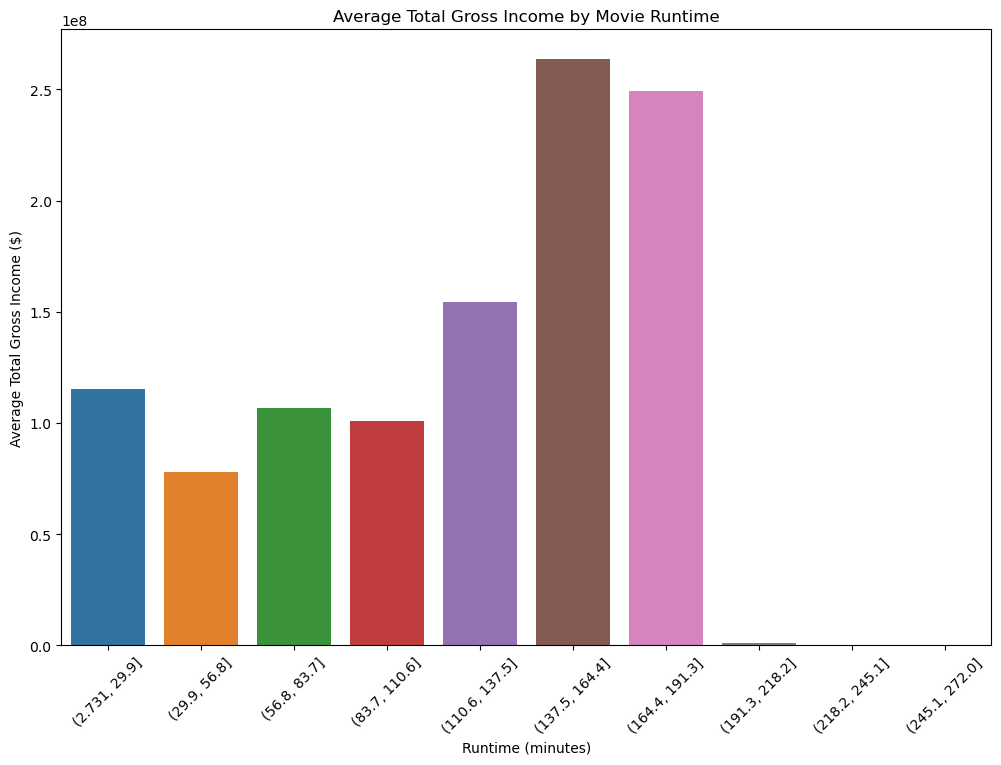

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('D:\\moringa\\Phase_one_all\\dsc-phase-1-project-v2-4\\zippedData\\im.db')

# Load the movie_basics table into a DataFrame
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Load the movie_ratings table into a DataFrame
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Close the connection
conn.close()

# Load the compressed CSV file into a DataFrame
movie_gross = pd.read_csv('D:\\moringa\\Phase_one_all\\dsc-phase-1-project-v2-4\\zippedData/bom.movie_gross.csv.gz', compression='gzip')

# Merge movie_basics and movie_ratings on movie_id
movies_df = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Merge movies_df with movie_gross on primary_title
movies_df = pd.merge(movies_df, movie_gross, left_on='primary_title', right_on='title')

# Drop redundant columns
movies_df = movies_df.drop(columns=['original_title', 'title'])

# Convert runtime_minutes to numeric
movies_df['runtime_minutes'] = pd.to_numeric(movies_df['runtime_minutes'], errors='coerce')

# Convert gross income columns to numeric, handling strings and removing commas if necessary
movies_df['domestic_gross'] = movies_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movies_df['foreign_gross'] = movies_df['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with NaN values in critical columns
movies_df = movies_df.dropna(subset=['runtime_minutes', 'domestic_gross', 'foreign_gross'])

# Calculate total gross income
movies_df['total_gross'] = movies_df['domestic_gross'] + movies_df['foreign_gross']

# Plot runtime vs total gross income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime_minutes', y='total_gross', data=movies_df)
plt.title('Runtime vs Total Gross Income')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Total Gross Income ($)')
plt.show()

# Summary of findings
average_runtime = movies_df['runtime_minutes'].mean()
median_runtime = movies_df['runtime_minutes'].median()
print(f"The average runtime of movies is {average_runtime:.2f} minutes.")
print(f"The median runtime of movies is {median_runtime:.2f} minutes.")

# Further analysis to identify the optimal range of movie length
runtime_bins = pd.cut(movies_df['runtime_minutes'], bins=10)
grouped_runtime = movies_df.groupby(runtime_bins)['total_gross'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='runtime_minutes', y='total_gross', data=grouped_runtime)
plt.title('Average Total Gross Income by Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Total Gross Income ($)')
plt.xticks(rotation=45)
plt.show()


In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('D:\\moringa\\Phase_one_all\\dsc-phase-1-project-v2-4\\zippedData\\im.db')

# Load the movie_basics table into a DataFrame
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Load the movie_ratings table into a DataFrame
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Close the connection
conn.close()

# Load the compressed CSV file into a DataFrame
movie_gross = pd.read_csv('D:\\moringa\\Phase_one_all\\dsc-phase-1-project-v2-4\\zippedData/bom.movie_gross.csv.gz', compression='gzip')

# Merge movie_basics and movie_ratings on movie_id
movies_df = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Merge movies_df with movie_gross on primary_title
movies_df = pd.merge(movies_df, movie_gross, left_on='primary_title', right_on='title')

# Drop redundant columns
movies_df = movies_df.drop(columns=['original_title', 'title'])

# Convert runtime_minutes to numeric
movies_df['runtime_minutes'] = pd.to_numeric(movies_df['runtime_minutes'], errors='coerce')

# Convert gross income columns to numeric, handling strings and removing commas if necessary
movies_df['domestic_gross'] = movies_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movies_df['foreign_gross'] = movies_df['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with NaN values in critical columns
movies_df = movies_df.dropna(subset=['runtime_minutes', 'domestic_gross', 'foreign_gross'])

# Calculate total gross income
movies_df['total_gross'] = movies_df['domestic_gross'] + movies_df['foreign_gross']

# Calculate summary statistics for movie runtime
average_runtime = movies_df['runtime_minutes'].mean()
median_runtime = movies_df['runtime_minutes'].median()

# Identify the runtime that corresponds to the highest average rating
runtime_bins = pd.cut(movies_df['runtime_minutes'], bins=10)
grouped_runtime_ratings = movies_df.groupby(runtime_bins)['averagerating'].mean().reset_index()
optimal_runtime = grouped_runtime_ratings.loc[grouped_runtime_ratings['averagerating'].idxmax()]

# Calculate correlation matrix
correlation_matrix = movies_df[['averagerating', 'numvotes', 'domestic_gross', 'foreign_gross', 'total_gross']].corr()

# Identify the metric most closely correlated to income
most_correlated_metric = correlation_matrix['total_gross'].drop('total_gross').idxmax()
correlation_value = correlation_matrix['total_gross'].drop('total_gross').max()

# Group by studio and calculate total gross income
studio_income = movies_df.groupby('studio')['total_gross'].sum().reset_index()

# Sort by total gross income in descending order
studio_income = studio_income.sort_values(by='total_gross', ascending=False)

# Identify the highest grossing studio
highest_grossing_studio = studio_income.iloc[0]

# Output the insights
print(f"1. The average runtime of movies is {average_runtime:.2f} minutes.")
print(f"2. The median runtime of movies is {median_runtime:.2f} minutes.")
print(f"3. The optimal runtime for the highest average rating is between {optimal_runtime['runtime_minutes'].left:.2f} and {optimal_runtime['runtime_minutes'].right:.2f} minutes with an average rating of {optimal_runtime['averagerating']:.2f}.")
print(f"4. The metric most closely correlated to income is {most_correlated_metric} with a correlation value of {correlation_value:.2f}.")
print(f"5. The highest grossing studio is {highest_grossing_studio['studio']} with a total gross income of ${highest_grossing_studio['total_gross']:.2f}.")


1. The average runtime of movies is 107.83 minutes.
2. The median runtime of movies is 106.00 minutes.
3. The optimal runtime for the highest average rating is between 191.30 and 218.20 minutes with an average rating of 8.70.
4. The metric most closely correlated to income is foreign_gross with a correlation value of 0.97.
5. The highest grossing studio is BV with a total gross income of $41930049368.50.


The analysis is as follows. 

Average and Median Runtime of Movies:

Trend: Most movies tend to be around 1 hour and 45 minutes long.
This suggests that the standard movie length in the dataset is close to typical industry standards for feature films.


Optimal Runtime for Highest Average Rating:

Trend: Longer movies, which are over 3 hours long, tend to receive higher ratings.
This could indicate that audiences appreciate more in-depth storytelling and complex plot development
often found in longer films. However, these long runtimes are relatively rare and might be specific to
certain genres or types of films (e.g., epics, detailed dramas).


Metric Closely Correlated to Income:

Trend: International box office revenue is a strong indicator of a movie's overall financial success. 
This highlights the importance of the global market for movie studios, 
suggesting that movies that perform well internationally tend to be highly successful overall.


Highest Grossing Studio:

Trend: BV, which is associated with Walt Disney Studios, leads in total gross income,
indicating that it has a significant market share and produces many high-grossing films. 
This dominance could be attributed to successful franchises, high production values,
and effective global marketing strategies.


THANK YOU MICROSOFT